In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import io



In [6]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


**Read and Print Data Set info**

In [11]:
file_name = list(uploaded.keys())[0]  # Get the uploaded file name dynamically
df = pd.read_csv(io.BytesIO(uploaded[file_name]))  # Read the CSV file


In [12]:
print("Dataset Preview:\n", df.head())
print("\nDataset Summary:\n", df.info())

Dataset Preview:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset Summary:
 None


**Selecting relevant features for clustering and Standardizing the data**

In [13]:
columns_to_use = ['Annual Income (k$)', 'Spending Score (1-100)']
data = df[columns_to_use]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

**Finding the optimal number of clusters using the Elbow Method**

In [14]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

**Plot the Elbow Method**

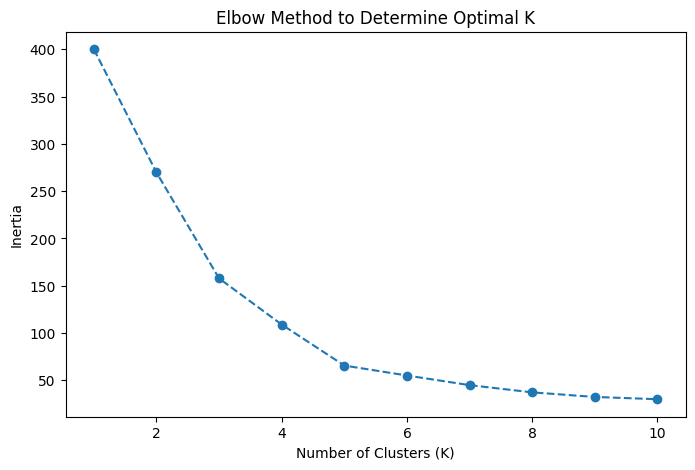

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

**Applying K-Means with the optimal number of clusters**

In [16]:
optimal_k = 5  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)


**Visualizing the clusters**

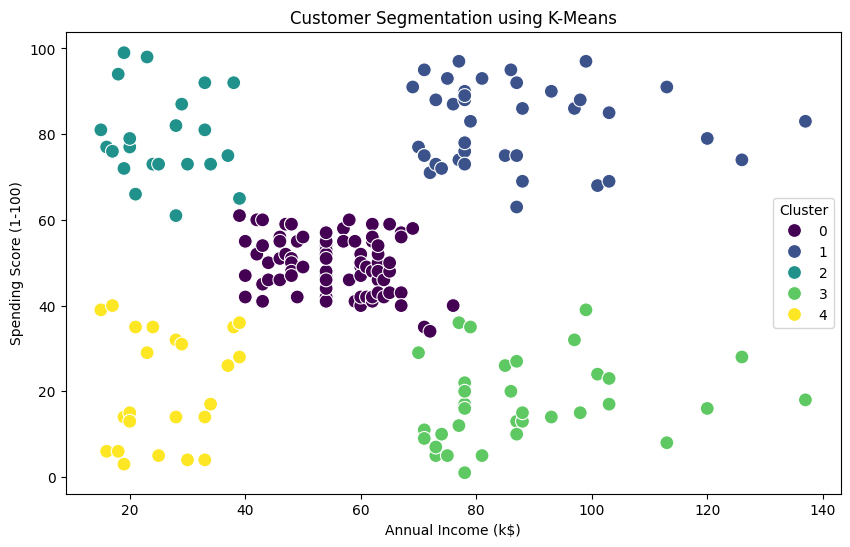

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[columns_to_use[0]], y=df[columns_to_use[1]], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel(columns_to_use[0])
plt.ylabel(columns_to_use[1])
plt.title('Customer Segmentation using K-Means')
plt.legend(title='Cluster')
plt.show()

**🧑‍💻By:Rishin Aiyappa A G**